<a href="https://colab.research.google.com/github/ZhiCLiu/DS-WorkShop/blob/main/Shallow_Neural_Network_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
%matplotlib inline

In [ ]:
expit(np.random.randn(3,1))

array([[0.51636213],
       [0.4554496 ],
       [0.25700038]])

In [ ]:
class ShallowNet:
  def __init__(self, input_shape=1, n1 = 32, output_shape=1):
    self.W1 =  np.random.randn(n1, input_shape)
    self.b1 = np.random.randn(n1,1)
    self.W2 =  np.random.randn(output_shape, n1)
    self.b2 = np.random.randn(output_shape,1)
    self.cache = {}

  def predict(self, X):
    Z1 = np.dot(self.W1, X) + self.b1
    A1 = expit(Z1)
    yhat = np.dot(self.W2, A1) + self.b2
    self.cache["Z1"], self.cache["A1"], self.cache["yhat"] = Z1, A1, yhat
    return yhat

  def loss(self, X, Y):
    yhat = self.predict(X)
    loss = np.dot( (yhat-Y), (yhat-Y).T)
    return loss.item()

  def grads(self, X, Y):
    num_samples = X.shape[1]
    dLdy = 2*(self.cache["yhat"] - Y)/num_samples 
    dLdW2 = np.dot(dLdy, self.cache["A1"].T)
    dLdb2 = np.sum(dLdy, axis = 1, keepdims= True)
    dLdA1 = np.dot(self.W2.T, dLdy)
    dLdZ1 = dLdA1 * self.cache["A1"]*(1.0-self.cache["A1"])
    dLdW1 = np.dot(dLdZ1, X.T)
    dLdb1 = np.sum(dLdZ1, axis = 1, keepdims= True)

    return dLdW1, dLdb1, dLdW2, dLdb2 

  def train(self, X, Y, epochs = 1000, lr = 0.01):
    history = []
    for _ in range(epochs):
      loss = self.loss(X,Y)
      history.append(loss)
      dLW1, dLdb1, dLdW2, dLdb2 = self.grads(X,Y)

      self.W1 -= lr*dLW1
      self.b1 -= lr*dLdb1
      self.W2 -= lr*dLdW2
      self.b2 -= lr*dLdb2

    plt.plot(history)

  def show(self, X, Y):
    plt.scatter(X, Y, alpha=0.5)
    plt.plot(X[0,:], self.predict(X)[0,:], 'k')

In [ ]:
m=100
X = np.linspace(-1,1,m)
X2 = X*X
eps = 0.1*np.random.randn(m)
Y = 1.5*X2+ 2*X - 0.5 +eps
X = np.reshape(X, (1,m))
Y = np.reshape(Y, (1,m))


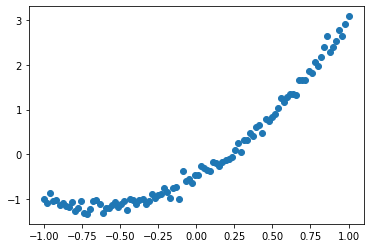

In [ ]:
plt.scatter(X, Y)

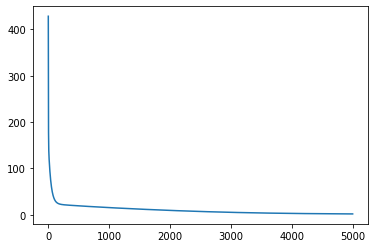

In [ ]:
model=ShallowNet()
model.train(X,Y, epochs=5000)

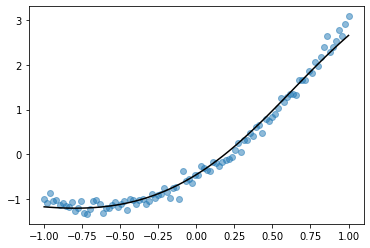

In [ ]:
model.show(X,Y)